In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import keras
import time
import seaborn as sns
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.regularizers import l1
from tensorflow.python.keras.regularizers import l2
from keras import  regularizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/team_project/Dataset3.csv', sep=',' , encoding='CP949')

In [0]:
data

,NODE_ID,NODE_NAME,SI_CODE,GU_CODE,X,Y,Longitude,Latitude,Radius,trafficlight_num,crosswalk_num,station_num,school_num,land_price,house_1,house_2,house_3,house_4,commerce_1,commerce_2,commerce_3,commerce_4,green_1,green_2,green_3,industry_1,industry_2,industry_3,limit_num,mediansep_,island_num,mean_lanes,mean_speed,mean_wth,mean_loadlen,busstop_num,police_num,CtoC_num,CtoP_num,total_acc
0,1150016800,현대맨션,A,DD,9.419266e+05,1950157.631,126.842562,37.548928,37,0,1,0,0,5.102635e+07,0.996526,0.003474,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.500000,281.000000,0,0,1,0,1
1,1160006100,신흥빌라,A,GG,9.425428e+05,1942717.922,126.850119,37.481912,37,0,1,0,1,2.834985e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,1.00,60.0,4.000000,645.500000,1,0,3,2,5
2,1160035000,연흥학원,A,GG,9.457569e+05,1944979.108,126.886304,37.502487,37,0,1,0,0,8.244801e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.666667,130.333333,0,1,2,3,5
3,1160044000,한일유앤아이아파트,A,GG,9.425526e+05,1945551.749,126.850009,37.507454,37,0,0,0,2,1.929201e+07,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,60.0,3.000000,433.000000,2,0,0,4,4
4,1100025000,연지초교,A,II,9.610632e+05,1959527.770,127.058698,37.634391,37,0,1,1,1,2.064954e+07,0.986185,0.013815,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,2,1.00,30.0,4.500000,616.000000,0,1,7,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,1380028700,-,B,PP,1.147437e+06,1691149.431,129.119698,35.204871,54,9,0,0,0,9.516307e+05,0.000000,0.000000,0.326679,0.000000,0.0,0.0,0.0,0.0,0.673321,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,3.40,56.0,42.225000,7500.000000,0,0,34,3,37
6052,1380029400,-,B,PP,1.147537e+06,1692084.379,129.120957,35.213283,55,12,2,0,0,3.826632e+06,0.000000,0.048482,0.000000,0.000000,0.0,0.0,0.0,0.0,0.064315,0.0,0.0,0.0,0.0,0.0,0.887203,1,2,4.00,52.5,42.225000,7500.000000,0,0,62,4,66
6053,1320005200,-,B,EE,1.142002e+06,1682717.438,129.058556,35.129650,56,0,0,0,0,3.825333e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,1,3.75,57.5,50.000000,3400.000000,0,0,30,10,40
6054,1320004900,-,B,EE,1.141862e+06,1682590.225,129.056998,35.128523,56,0,0,0,0,1.623048e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,0,3.40,52.0,50.000000,3400.000000,0,0,4,1,5


In [0]:
raw_x = data[['Radius','trafficlight_num','crosswalk_num','station_num','school_num','land_price','house_1','house_2','house_3','house_4','commerce_1','commerce_2','commerce_3','commerce_4','green_1','green_2','green_3','industry_1','industry_2','industry_3','limit_num','mediansep_','island_num','mean_lanes','mean_speed','mean_wth','mean_loadlen','busstop_num','police_num']]
raw_y = data[['total_acc']]
raw_x_CtoC = data[['Radius','trafficlight_num','crosswalk_num','station_num','school_num','land_price','house_1','house_2','house_3','house_4','commerce_1','commerce_2','commerce_3','commerce_4','green_1','green_2','green_3','industry_1','industry_2','industry_3','limit_num','mediansep_','island_num','mean_lanes','mean_speed','mean_wth','mean_loadlen','busstop_num','police_num']]
raw_y_CtoC = data[['CtoC_num']]
raw_x_CtoP = data[['Radius','trafficlight_num','crosswalk_num','station_num','school_num','land_price','house_1','house_2','house_3','house_4','commerce_1','commerce_2','commerce_3','commerce_4','green_1','green_2','green_3','industry_1','industry_2','industry_3','limit_num','mediansep_','island_num','mean_lanes','mean_speed','mean_wth','mean_loadlen','busstop_num','police_num']]
raw_y_CtoP = data[['CtoC_num']]

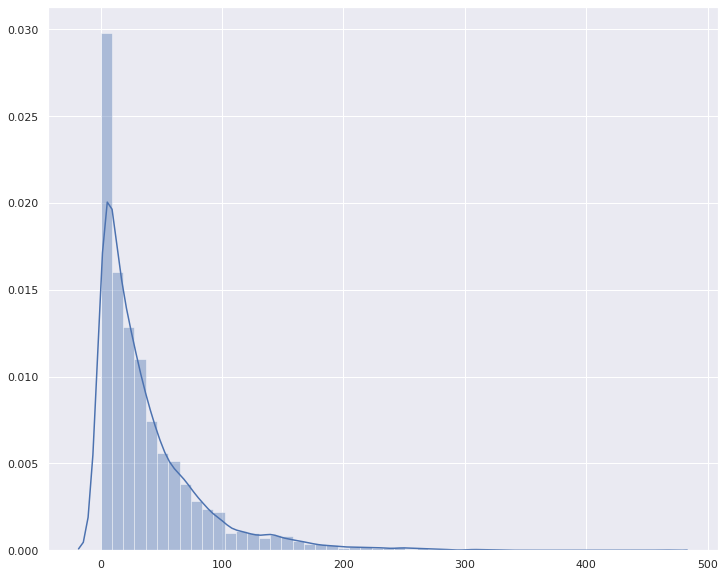

In [0]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.distplot(raw_y,kde = True)

In [0]:
####################################################################################
minmax_scaler_x = MinMaxScaler()  #각 피처에 대해 0과 1사이로 스케일이 진행 
minmax_scaler_y = MinMaxScaler()
minmax_scaler_x.fit(raw_x)
minmax_scaler_y.fit(raw_y)
minmax_xscale = minmax_scaler_x.transform(raw_x)
minmax_yscale = minmax_scaler_y.transform(raw_y)
####################################################################################
standard_scaler_x = StandardScaler()
standard_scaler_y = StandardScaler()
standard_scaler_x.fit(raw_x)
standard_scaler_y.fit(raw_y)
standard_xscale = standard_scaler_x.transform(raw_x)
standard_yscale = standard_scaler_y.transform(raw_y)
####################################################################################
maxabs_scaler_x = MaxAbsScaler()
maxabs_scaler_y = MaxAbsScaler()
maxabs_scaler_x.fit(raw_x)
maxabs_scaler_y.fit(raw_y)
maxabs_xscale = maxabs_scaler_x.transform(raw_x)
maxabs_yscale = maxabs_scaler_y.transform(raw_y)
####################################################################################
robust_scaler_x = RobustScaler()
robust_scaler_y = RobustScaler()
robust_scaler_x.fit(raw_x)
robust_scaler_y.fit(raw_y)
robust_xscale = robust_scaler_x.transform(raw_x)
robust_yscale = robust_scaler_y.transform(raw_y)
####################################################################################

In [0]:
maxabs_scaler_x = MaxAbsScaler()
maxabs_scaler_y = MaxAbsScaler()
maxabs_scaler_x.fit(raw_x_CtoC)
maxabs_scaler_y.fit(raw_y_CtoC)
maxabs_xscale_CtoC = maxabs_scaler_x.transform(raw_x_CtoC)
maxabs_yscale_CtoC = maxabs_scaler_y.transform(raw_y_CtoC)

maxabs_scaler_x = MaxAbsScaler()
maxabs_scaler_y = MaxAbsScaler()
maxabs_scaler_x.fit(raw_x_CtoP)
maxabs_scaler_y.fit(raw_y_CtoP)
maxabs_xscale_CtoP = maxabs_scaler_x.transform(raw_x_CtoP)
maxabs_yscale_CtoP = maxabs_scaler_y.transform(raw_y_CtoP)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(maxabs_xscale,maxabs_yscale ,test_size = 0.2, random_state = 42)
x_train_CtoC, x_test_CtoC , y_train_CtoC, y_test_CtoC = train_test_split(maxabs_xscale, maxabs_yscale_CtoC, test_size = 0.2, random_state = 42)
x_train_CtoP, x_test_CtoP , y_train_CtoP, y_test_CtoP = train_test_split(maxabs_xscale, maxabs_yscale_CtoP, test_size = 0.2, random_state = 42)

In [0]:
model = Sequential()
model.add(Dense(30, input_dim=29,  kernel_regularizer = regularizers.l1_l2(l1 =0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
Dropout(0.3)


model.add(Dense(60,  kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
Dropout(0.3)


model.add(Dense(60,  kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
Dropout(0.3)


# model.add(Dense(30,  kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# Dropout(0.3)

model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 30)                900       
_________________________________________________________________
batch_normalization_29 (Batc (None, 30)                120       
_________________________________________________________________
activation_29 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 60)                1860      
_________________________________________________________________
batch_normalization_30 (Batc (None, 60)                240       
_________________________________________________________________
activation_30 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 60)               

In [0]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
epochs = 100
learning_rate = 0.01
decay_rate = learning_rate  / epochs
opt = Adam(lr = learning_rate, decay = decay_rate)
model.compile(optimizer= opt,loss='mae', metrics=['mse','mae'])

In [0]:
# early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta = 1e-3 ,patience = 10)
# history = model.fit(X_train, y_train, epochs = epochs, batch_size= 9,  verbose=1,callbacks = [early_stop] ,validation_split=0.3)
start = time.time()
history = model.fit(x_train, y_train, epochs = epochs, batch_size= 7,  verbose=1,validation_split=0.3)
print("time: ", time.time() - start ,"seconds")

Train on 3390 samples, validate on 1454 samples
Epoch 1/100
3390/3390 [==============================] - 3s 765us/sample - loss: 0.3770 - mean_squared_error: 0.0756 - mean_absolute_error: 0.1277 - val_loss: 0.1187 - val_mean_squared_error: 0.0085 - val_mean_absolute_error: 0.0573
Epoch 2/100
3390/3390 [==============================] - 2s 481us/sample - loss: 0.1058 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0523 - val_loss: 0.0847 - val_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0571
Epoch 3/100
3390/3390 [==============================] - 2s 488us/sample - loss: 0.0722 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0503 - val_loss: 0.0666 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0533
Epoch 4/100
3390/3390 [==============================] - 2s 489us/sample - loss: 0.0645 - mean_squared_error: 0.0063 - mean_absolute_error: 0.0499 - val_loss: 0.0767 - val_mean_squared_error: 0.0112 - val_mean_absolute_error: 0.0640
Epoch 5/100
3390/339

In [0]:
# from keras.models import load_model
# model.save('SeoulBusan_20191201.h5')

In [0]:
# from tensorflow.keras.models import load_model
# model = load_model('SeoulBusan_BatchNorm.h5')

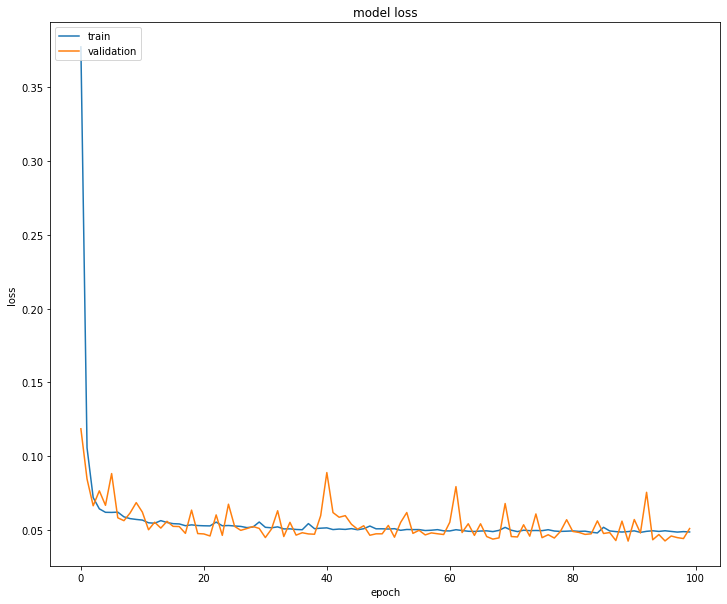

In [0]:
plt.figure(figsize=(12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

로그 스케일 루트 스케일 lr 스케쥴러 plot  minseokkim@kaist.ac.kr

feature
 
light_num/crossway_num/center/lanes/max_spd/road_length/road_bt/school_num/	stations/police_num  minseokkim@kaist.ac.kr

In [0]:
results = model.evaluate(x_test, y_test, batch_size = 7)
results

1212/1212 [==============================] - 0s 184us/sample - loss: 0.0495 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0469


[0.04945403229900122, 0.0039855707, 0.046949346]

In [0]:
total_predictions = model.predict(x_test).flatten()

In [0]:
inverse_total_predictions = maxabs_scaler_y.inverse_transform(total_predictions.reshape(-1,1)) 
inverse_y_test = maxabs_scaler_y.inverse_transform(y_test)

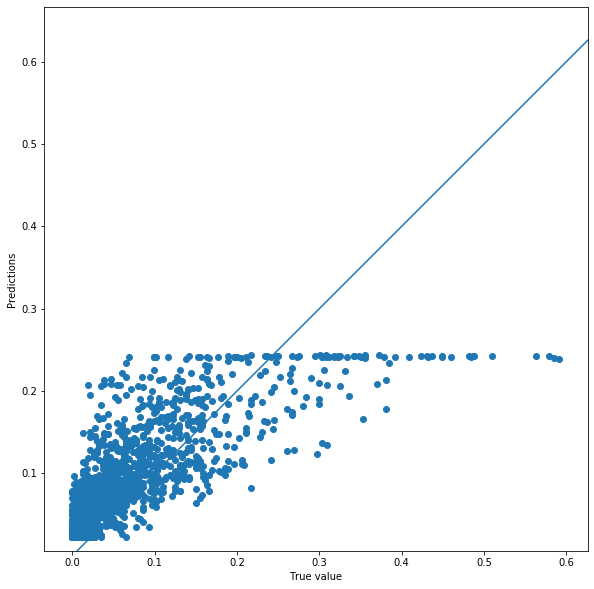

In [0]:
# test_predictions = model.predict(x_test).flatten()
plt.figure(figsize = (12,10))

# plt.scatter(y_test, test_predictions)
plt.scatter(y_test, total_predictions)
plt.xlabel('True value')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-400,400],[-400,400])

In [0]:
total_mse = mean_squared_error(inverse_y_test, inverse_total_predictions)
total_r2 = r2_score(inverse_y_test, inverse_total_predictions)

print('total_mse: ',total_mse)
print('total_r2: ',total_r2)

total_mse:  673.2465536809603
total_r2:  0.521352366423337


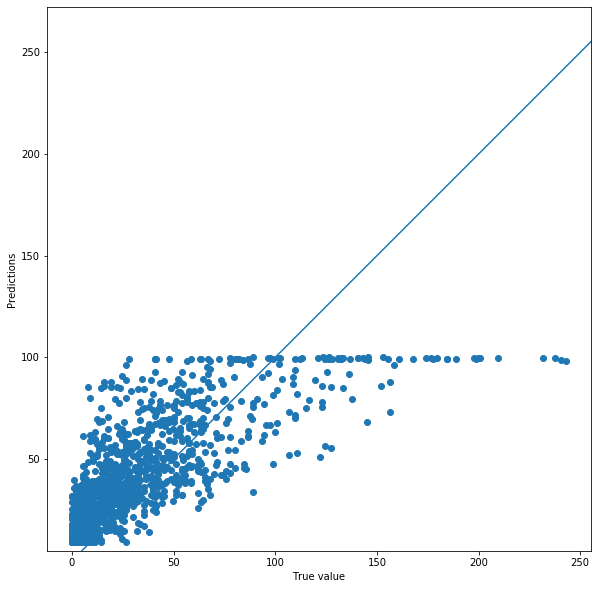

In [0]:
# test_predictions = model.predict(x_test).flatten()
plt.figure(figsize = (12,10))

# plt.scatter(y_test, test_predictions)
plt.scatter(inverse_y_test, inverse_total_predictions)
plt.xlabel('True value')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-400,400],[-400,400])

In [0]:
start = time.time()
history = model.fit(x_train_CtoC, y_train_CtoC, epochs = 70, batch_size= 7,  verbose=1,validation_split=0.2)
print("time: ", time.time() - start ,"seconds")

Train on 3875 samples, validate on 969 samples
Epoch 1/70
3875/3875 [==============================] - 2s 445us/sample - loss: 0.0459 - mean_squared_error: 0.0058 - mean_absolute_error: 0.0435 - val_loss: 0.0468 - val_mean_squared_error: 0.0043 - val_mean_absolute_error: 0.0445
Epoch 2/70
3875/3875 [==============================] - 2s 437us/sample - loss: 0.0462 - mean_squared_error: 0.0059 - mean_absolute_error: 0.0439 - val_loss: 0.0519 - val_mean_squared_error: 0.0050 - val_mean_absolute_error: 0.0496
Epoch 3/70
3875/3875 [==============================] - 2s 428us/sample - loss: 0.0453 - mean_squared_error: 0.0057 - mean_absolute_error: 0.0430 - val_loss: 0.0469 - val_mean_squared_error: 0.0042 - val_mean_absolute_error: 0.0447
Epoch 4/70
3875/3875 [==============================] - 2s 427us/sample - loss: 0.0454 - mean_squared_error: 0.0058 - mean_absolute_error: 0.0431 - val_loss: 0.0445 - val_mean_squared_error: 0.0057 - val_mean_absolute_error: 0.0422
Epoch 5/70
3875/3875 [===

In [0]:
results = model.evaluate(x_test_CtoC, y_test_CtoC, batch_size = 7)
results

1212/1212 [==============================] - 0s 198us/sample - loss: 0.0405 - mean_squared_error: 0.0041 - mean_absolute_error: 0.0389


[0.040466434521317825, 0.0041446676, 0.038856965]

In [0]:
CtoC_predictions = model.predict(x_test_CtoC).flatten()

In [0]:
inverse_CtoC_predictions = maxabs_scaler_y.inverse_transform(CtoC_predictions.reshape(-1,1)) 
inverse_y_test_CtoC = maxabs_scaler_y.inverse_transform(y_test_CtoC)

In [0]:
CtoC_mse = mean_squared_error(inverse_y_test_CtoC, inverse_CtoC_predictions)
CtoC_r2 = r2_score(inverse_y_test_CtoC, inverse_CtoC_predictions)

print('CtoC_mse: ',CtoC_mse)
print('CtoC_r2: ',CtoC_r2)

CtoC_mse:  700.1212958903016
CtoC_r2:  0.4639587803394507


In [0]:
print(inverse_y_test_CtoC)
print(inverse_CtoC_predictions)

[[ 11.]
 [111.]
 [  5.]
 ...
 [  2.]
 [ 22.]
 [ 14.]]
[[14.4985075]
 [64.67787  ]
 [ 4.3001275]
 ...
 [ 0.6374742]
 [36.649612 ]
 [23.520506 ]]


In [0]:
start = time.time()
history = model.fit(x_train_CtoP, y_train_CtoP, epochs = 70, batch_size= 7,  verbose=1,validation_split=0.2)
print("time: ", time.time() - start ,"seconds")

Train on 3875 samples, validate on 969 samples
Epoch 1/70
3875/3875 [==============================] - 2s 484us/sample - loss: 0.0437 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0421 - val_loss: 0.0441 - val_mean_squared_error: 0.0045 - val_mean_absolute_error: 0.0425
Epoch 2/70
3875/3875 [==============================] - 2s 502us/sample - loss: 0.0444 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0427 - val_loss: 0.0393 - val_mean_squared_error: 0.0047 - val_mean_absolute_error: 0.0377
Epoch 3/70
3875/3875 [==============================] - 2s 472us/sample - loss: 0.0443 - mean_squared_error: 0.0055 - mean_absolute_error: 0.0427 - val_loss: 0.0404 - val_mean_squared_error: 0.0045 - val_mean_absolute_error: 0.0388
Epoch 4/70
3875/3875 [==============================] - 2s 444us/sample - loss: 0.0440 - mean_squared_error: 0.0056 - mean_absolute_error: 0.0425 - val_loss: 0.0460 - val_mean_squared_error: 0.0053 - val_mean_absolute_error: 0.0444
Epoch 5/70
3875/3875 [===

In [0]:
results = model.evaluate(x_test_CtoP, y_test_CtoP, batch_size = 7)
results

1212/1212 [==============================] - 0s 187us/sample - loss: 0.0376 - mean_squared_error: 0.0041 - mean_absolute_error: 0.0363


[0.037600612809586494, 0.004114875, 0.036313053]

In [0]:
CtoP_predictions = model.predict(x_test_CtoP).flatten()

In [0]:
inverse_CtoP_predictions = maxabs_scaler_y.inverse_transform(CtoP_predictions.reshape(-1,1)) 
inverse_y_test_CtoP = maxabs_scaler_y.inverse_transform(y_test_CtoP)

In [0]:
CtoP_mse = mean_squared_error(inverse_y_test_CtoP, inverse_CtoP_predictions)
CtoP_r2 = r2_score(inverse_y_test_CtoP, inverse_CtoP_predictions)

print('CtoP_mse: ',CtoP_mse)
print('CtoP_r2: ',CtoP_r2)

CtoP_mse:  695.0887909979517
CtoP_r2:  0.4678118699058986


In [0]:
combined_result = inverse_CtoC_predictions + inverse_CtoP_predictions

In [0]:
print(inverse_y_test[:10])
print(combined_result[:10])
print(inverse_total_predictions)

[[ 15.02580645]
 [109.6       ]
 [ 10.60645161]
 [ 13.25806452]
 [  7.07096774]
 [  6.18709677]
 [ 57.4516129 ]
 [  4.41935484]
 [ 28.28387097]
 [ 59.21935484]]
[[ 28.712341 ]
 [125.75873  ]
 [  9.434879 ]
 [ 64.028786 ]
 [  2.2031467]
 [  4.211134 ]
 [ 92.34096  ]
 [  1.3691658]
 [ 48.860313 ]
 [ 83.55728  ]]
[[30.608932]
 [93.615776]
 [23.624834]
 ...
 [15.938986]
 [43.018642]
 [36.671486]]


In [0]:
mse_lst = []
r2_lst = []

mse_lst.append(mse)
r2_lst.append(r2)

combined_mse = mean_squared_error(inverse_y_test, combined_result)
combined_r2 = r2_score(inverse_y_test, combined_result)

combined_mse_lst = []
combined_r2_lst = []

combined_mse_lst.append(combined_mse)
combined_r2_lst.append(combined_r2)

print('total Mean squared error: ', mse)
print('total R2 score: ', r2)

print('Combined Mean squared error: ', combined_mse)
print('Combined R2 score: ', combined_r2)

NameError: ignored

In [0]:
# if  "Radius" in raw_x:
#     case1 = mse
#     case2 = combined_mse
#     case3 = 0
#     case4 = 0
# else:    
#     case3 = mse
#     case4 = combined_mse

In [0]:
# x = ['case1', 'case2', 'case3', 'case4']

# y = [case1, case2, case3, case4]

# plt.xlabel('keras')
# plt.ylabel('mse')
# plt.bar(x,y,width = 0.7, color = 'green')

In [0]:
# for cases in y:
#     print(cases)

In [0]:
# import matplotlib.pyplot as plt

# x = ['case1', 'case2', 'case3', 'case4']

# y = [716.3639496173882, 809.4214031384474, 557.026564792903, 1146.63635762345]

# plt.xlabel('keras')
# plt.ylabel('mse')
# plt.ylim(500,1200)
# plt.bar(x,y,width = 0.7, color = 'green')